In [1]:
import torch
import os
from models import ExtraSmallUNet
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import re

In [4]:
a = "Grietas longitudinales"
b = "Hueco"

In [13]:
re.sub(r'(?<=Grietas).*$', "", a)

'Grietas'

In [2]:
file_fold = 'fold0'
model_weights = torch.load(f"checkpoints/Parcheo/{file_fold}/model_best_metric.pt")
parcheo_model = ExtraSmallUNet(n_channels=3, n_classes=1)
parcheo_model = torch.nn.DataParallel(parcheo_model, device_ids=range(torch.cuda.device_count()))
parcheo_model.load_state_dict(model_weights)
parcheo_model.eval()
print("Loaded!")

Loaded!


In [3]:
image = "data/SIMEPU/v2/images/VIRB0148_long_crack_3212_1.jpg"

In [4]:
image = io.imread("data/SIMEPU/v2/images/VIRB0148_pot_1813_1.jpg")
image.shape

(512, 512, 3)

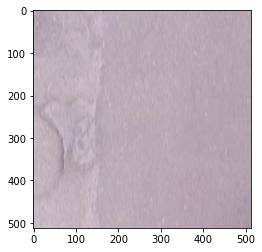

In [5]:
plt.imshow(image)

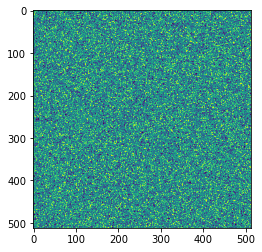

In [6]:
mask = np.random.randint(0,2,(512,512))
plt.imshow(mask)

In [21]:
for key in plt.rcParams:
    if "inches" in key:
        print(key)

savefig.pad_inches


In [23]:
plt.rcParams['savefig.pad_inches'] = "0"

In [28]:
lst1 = {"a":1,"b":2}
lst2 = ["d","c"]
if list(set(lst1) & set(lst2)):
    print("si")

In [41]:
a = (2,2)
rows,cols = a

In [39]:
a = {(1,2):[1,2,3],(1,3):[4,5,6]}

In [40]:
a[(1,2)]

[1, 2, 3]

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

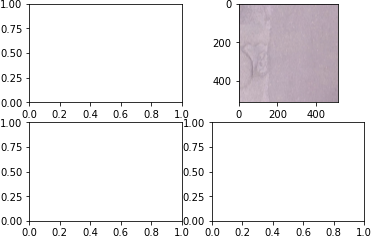

In [47]:
fig, ax = plt.subplots(rows,cols)
masked_lv = np.ma.masked_where(mask == 0, mask)
ax[(0,1)].imshow(image, cmap="gray")
ax[0].axis("off")
ax[1].imshow(image, cmap="gray")
ax[1].axis("off")
ax[1].imshow(masked_lv, 'hsv', interpolation='bilinear', alpha=0.33)

In [75]:
np.choose(image, mask)

ValueError: Need at least 0 and at most 32 array objects.

In [73]:
m,n = mask.shape
I,J = np.ogrid[:m,:n]

In [83]:
smask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

In [84]:
image[smask].shape

(512, 512, 3, 512, 3)

In [88]:
image[mask==1].shape

(130919, 3)